In [1]:
import os
import sys
import pickle

parent_path = os.path.dirname(os.path.dirname(os.getcwd()))
if parent_path not in sys.path: sys.path.append(parent_path) 
    
import numpy as np
import proplot as plot

In [2]:
models = ['mlp_768_mnist', 'lca_768_mlp_mnist']

workspace_dir = os.path.join(*[os.path.expanduser('~'), 'Work'])
project_dir = os.path.join(workspace_dir, 'Torch_projects')

In [3]:
analysis_files = [
    os.path.join(*[project_dir, model, 'analysis', '0', 'savefiles', 'linf_adversarial_analysis.npz'])
    for model in models]

attack_success = {}; attack_types = {}; epsilons = {}; attack_params = {}
for model, file in zip(models, analysis_files):
    analysis = np.load(file, allow_pickle=True)['data'].item()
    attack_success[model] = analysis['adversarial_analysis']
    attack_types[model] = analysis['attack_types']
    epsilons[model] = analysis['epsilons']
    attack_params[model] = analysis['attack_params']

In [4]:
abs_filename = os.path.join(
    *[workspace_dir, 'analysis-by-synthesis', 'figures', 'Linf_accuracy_distortion_curves.pickle'])
with open(abs_filename, 'rb') as file:
    abs_linf_pgd_accuracies = pickle.load(file)

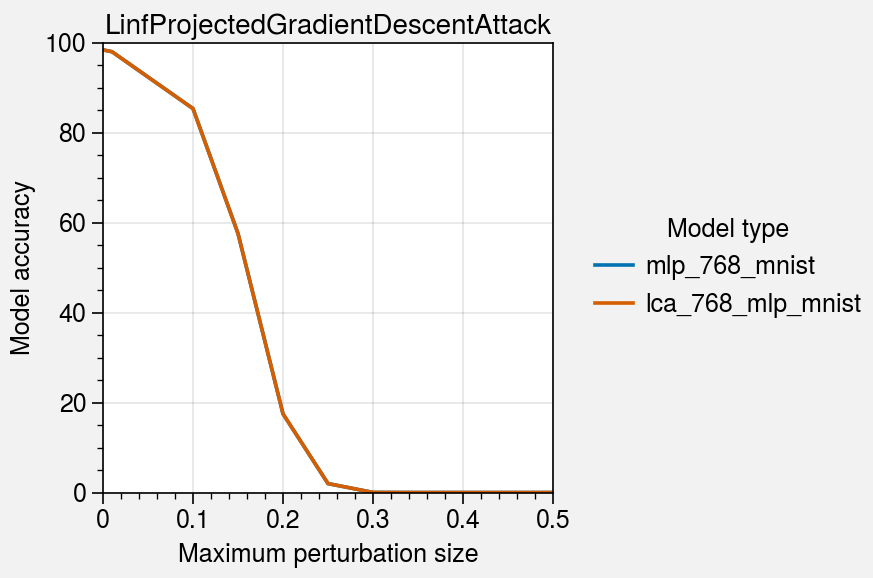

In [5]:
num_attacks = attack_success[models[0]].shape[0]
fig, axes = plot.subplots(ncols=num_attacks, nrows=1, share=0)
handles = []
for model_index, model_type in enumerate(models):
    for attack_index, attack_type in enumerate(attack_types[model]):
        attack_accuracy = 1.0 - attack_success[model][attack_index, ...].mean(axis=-1)
        handle = axes[attack_index].plot(epsilons[model], 100*attack_accuracy, label=model_type)
        if attack_index == 0:
            handles.extend(handle)
        #if model_index == 0 and attack_type == 'LinfProjectedGradientDescentAttack':
        #    for abs_model_type, abs_model_accuracy in abs_linf_pgd_accuracies.items():
        #        if abs_model_type not in ['Binary CNN', 'Nearest Neighbor']:
        #            handle = axes[attack_index].plot(
        #                abs_model_accuracy['x'], abs_model_accuracy['y'], label=abs_model_type)
        #            handles.extend(handle)
        axes[attack_index].format(title=attack_type)
axes[0].format(ylabel='Model accuracy')
xmax = 0.5
axes.format(
    xlabel='Maximum perturbation size',
    xlim=[0.0, xmax],
    ylim=[0, 100])
fig.legend(handles, ncols=1, frame=False, label='Model type', loc='right')
plot.show()